In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("fe.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Imputation

In [4]:
df.isnull().sum() #check null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
(df.isnull().sum()/len(df))*100 #check null values in percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df.isnull().mean() #without percentage values

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Dropping rows with null values

In [7]:
new_df = df.dropna()

In [8]:
new_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# compare length of the dataframe before and after removing the null values
df.shape

(891, 12)

In [10]:
new_df.shape

(183, 12)

In [11]:
len(df)

891

In [12]:
len(new_df)

183

Drop the column 
1. Outlier
2. Threshold
we will see threshold technique where the value of threshold is 0.75, so it means if any of the columns have more than 75% of null values, we can drop it.
the value depends on you for threshold

In [13]:
threshold = 0.75

In [14]:
df = df[df.columns[df.isnull().mean()< threshold]]

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

Numerical Imputation: replace null values with median value of the column
Imputation is a more preferable option rather than dropping because it preserves the data size. However, there is an important selection of what you impute to the missing values.

In [17]:
#fill the missing value with medians of age column
df["Age"] = df["Age"].fillna(df["Age"].median())


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Categorical Imputation : replace with the maxium occured value
Replacing the missing values with the maximum occurred value in a column is a good option as well for handling categorical columns.

In [19]:
df["Embarked"].fillna(df["Embarked"].value_counts().idxmax(),inplace=True)# fill the null with the maximum occured value

/var/folders/qc/9ln641g17qz1q64c3qbm8flw0000gn/T/ipykernel_1675/3069660240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].value_counts().idxmax(),inplace=True)# fill the null with the maximum occured value


In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Handling Outliers
Outlier Handling can be used on a variety of scales to produce a more accurate data representation. This has an impact on the model's performance. Depending on the model, the effect could be large or minimal; for example, linear regression is particularly susceptible to outliers. This procedure should be completed prior to model training. The various methods of handling outliers include:
• Removal: Outlier-containing entries are deleted from the distribution. However, if there are outliers across numerous variables, this strategy may result in a big chunk of the datasheet being missed.
• Replacing values: Alternatively, the outliers could be handled as missing values and replaced with suitable imputation.
• Capping: Using an arbitrary value or a value from a variable distribution to replate the maximum and minimum values.
• Discretization : Discretization is the process of converting continuous variables, models, and functions into discrete ones.
This is accomplished by constructing a series of continuous intervals (or bins) that span the range of our desired variable/model/function.

we need to check the standar deviation for the dataset and any values out of the two polls are called outliers

In [21]:
len(df)

891

In [22]:
df.shape

(891, 11)

In [23]:
factor=3 #using standard deviation and mean
upper_limit = df["Fare"].mean() + df["Fare"].std()*factor
lower_limit = df["Fare"].mean() - df["Fare"].std()*factor

In [24]:
new_df1 = df[(df["Fare"] < upper_limit) & (df["Fare"] > lower_limit)]

In [25]:
print(len(new_df1))

871


Caping the Outliers
Another option for handling outliers is to cap them instead of dropping. So you can keep your data size and at the end of the day, it might be better for the final model performance.

In [26]:
df["Fare"].min(), df["Fare"].max() #check extreme minimum and maximum values
#in real life scenario fare cannot be 0.00 so this method is not proper use another method

(np.float64(0.0), np.float64(512.3292))

In [29]:
#Interquantile method
upper_lim= df["Fare"].quantile(0.95)
lower_lim = df["Fare"].quantile(0.05)
df.loc[(df["Fare"] > upper_lim),"Fare"] = upper_lim
df.loc[(df["Fare"] < lower_lim),"Fare"] = lower_lim
df["Fare"].min(), df["Fare"].max()

(np.float64(7.225), np.float64(111.18226250000001))

In [30]:
len(df)

891

Feature Creation
Preprocessing is all about changing raw data into something that will help you improve the performance of your model. But you must be thinking how can we create own Feature and will it help increase the performance of my model ?
Creating features involves identifying the variables that will be most useful in the predictive model. This is a subjective process that requires human intervention and creativity.
So, feature creation is the process of constructing new features from existing data to train a machine learning model. Let's implement the above statement for our data.

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
df["Family_size"] = df["SibSp"] + df["Parch"] #adding column

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Binning
Data binning is a data pre-processing method used to minimize the effects of small observation errors which tends to improve the model performance applying domain knowledge. Binning is done to create bins for continuous numerical variables where they are converted to categorical variables.
The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin. This has a smoothing effect on the input data and may also reduce the chances of overfitting in case of small datasets. It also helps in avoiding the effects of outliers as we are grouping them into one special group.

In [34]:
df["Age_of_group"] = pd.cut(df["Age"], bins = [0,18,50,100],labels=["Children","Adult","Old"])
df["Age_of_group"].value_counts()

Age_of_group
Adult       688
Children    139
Old          64
Name: count, dtype: int64

<Axes: ylabel='Age_of_group'>

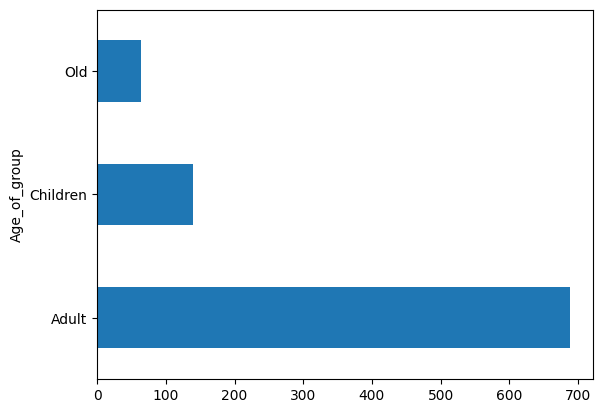

In [35]:
df["Age_of_group"].value_counts().plot.barh()

<Axes: ylabel='count'>

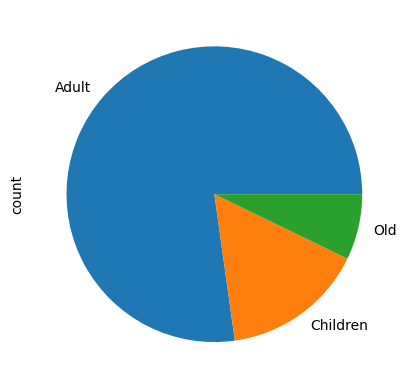

In [36]:
df["Age_of_group"].value_counts().plot.pie()

Variable Transformation
What is a Normal Distribution? (mean=mediam=mode)
Normal distribution is a widely used probability and statistical concept where mean, median and mode of such distribution have the same value and it can be defined with just two parameters: mean and variance.
A skewed distribution is neither symmetric nor normal because the data points cluster more toward one side of the scale than the other creating a curve where there is no such mirror imaging.

The most commonly-used methods to transform variables are the following:
1. Logarithm transformation - log(x)
2. Square root transformation - sqrt(x)
3. Reciprocal transformation - 1 / x
4. Exponential transformation - exp(x)

<Axes: ylabel='Frequency'>

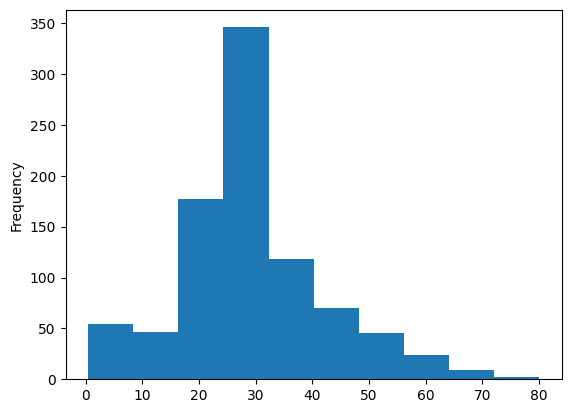

In [37]:
df["Age"].plot.hist()

<Axes: ylabel='Frequency'>

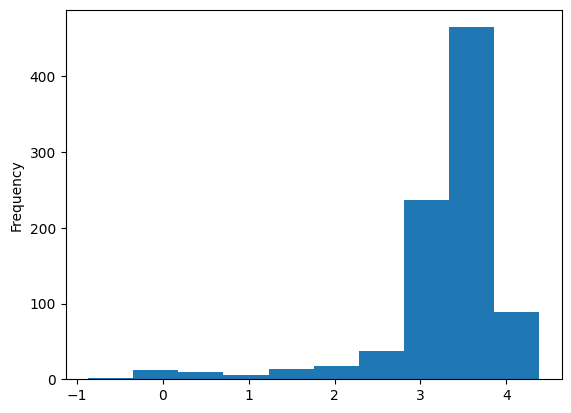

In [38]:
df["Age_log"] = np.log(df.Age) #apply log
df["Age_log"].plot.hist()

<Axes: ylabel='Frequency'>

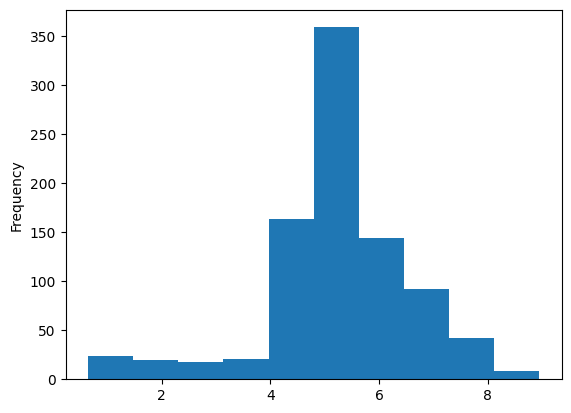

In [39]:
df["Age_sqrt"] = df.Age**(1/2) #apply Square root
df["Age_sqrt"].plot.hist()

<Axes: ylabel='Frequency'>

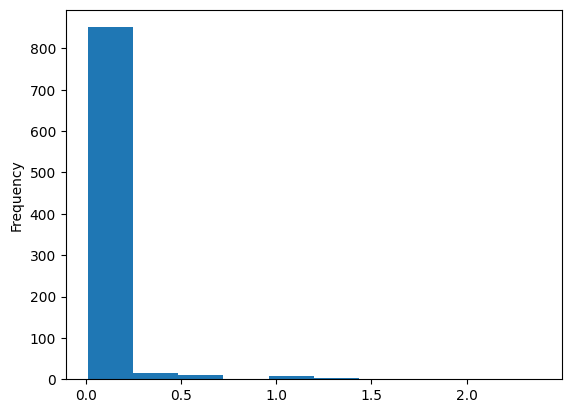

In [40]:
df["Age_reciprocal"] = 1/df.Age #apply reciprocal
df["Age_reciprocal"].plot.hist()

<Axes: ylabel='Frequency'>

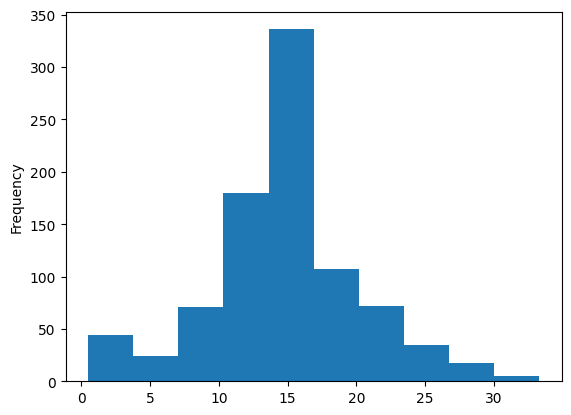

In [41]:
df["Age_exponential"] = df.Age**(4/5) # apply exponential
df["Age_exponential"].plot.hist()

Scaling
Feature scaling is one of the most universal and difficult problems in machine learning, yet it's one of the most important things to get right. In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, we don't expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared?
Due to higher range, machine learning models create bias towards income column, but we want to examine each feature equally. If not scale, the feature with a higher value range starts dominating when calculating distances
After a scaling operation, the continuous features become similar in terms of range. Although this step isn't required for many algorithms, it's still a good idea to do so.

There are two common ways for scaling :
1. Normalization: All values are scaled in a specified range between 0 and 1 via normalisation (or min-max normalisation).
This modification has no influence on the feature's distribution, however it does worsen the effects of outliers due to lower standard deviations. As a result, it is advised that outliers be dealt with prior to normalisation. \
Xhorm = (X - Xmin)/(Xmax - Xmin)
2. Standardization: Standardization (also known as z-score normalisation) is the process of scaling values while accounting for standard deviation. If the standard deviation of features differs, the range of those features will likewise differ. The effect of outliers in the characteristics is reduced as a result. To arrive at a distribution with a 0 mean and 1 variance, all the data points are subtracted by their mean and the result divided by the distribution's variance. \
Z = (X - Xmean)/sigma;
where sigma = standard deviation

In [45]:
df["Fare"] = (df["Fare"]-df["Fare"].mean())/df["Fare"].std() #standardization 

In [46]:
df["Fare"].head()

0   -0.709483
1    1.499929
2   -0.686193
3    0.872531
4   -0.681880
Name: Fare, dtype: float64

In [47]:
df["Age"] = (df["Age"]-df["Age"].min())/(df["Age"].max()-df["Age"].min()) #nomalization

In [48]:
df["Age"].head()

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: Age, dtype: float64

One-Hot Encoding
Categorical data are variables that contain label values rather than numeric values.Some algorithms can work with categorical data directly but many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical data must be converted to a numerical form.

How to Convert Categorica Data to Numerical Data?
One-Hot Encoding changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information.
If you have N distinct values/classes in the categorical column, it is enough to map them to N-1 binary columns. So, One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data. The categorical variable is removed and a new binary variable is added for each unique categorical value.

In [49]:
df = pd.get_dummies(df,columns=["Sex","Embarked"]) #dummy variables

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Family_size,Age_of_group,Age_log,Age_sqrt,Age_reciprocal,Age_exponential,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,-0.709483,1,Adult,3.091042,4.690416,0.045455,11.855999,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,1.499929,1,Adult,3.637586,6.164414,0.026316,18.358064,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,-0.686193,0,Adult,3.258097,5.099020,0.038462,13.551229,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.872531,1,Adult,3.555348,5.916080,0.028571,17.189151,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.434531,0,0,373450,-0.681880,0,Adult,3.555348,5.916080,0.028571,17.189151,False,True,False,False,True


In [51]:
df.shape

(891, 20)